# #### Item Base CF Exercise

Goal - generate recommendations based on both positive and negative ratings

AND

Create a recommendation algorithm that can predict which movies a person likes/dislikes

In [22]:
import pandas as pd

#Get data
r_cols = ['user_id', 'movie_id', 'rating']
ratings = pd.read_csv('C:/Users/amontagut/Desktop/Python/ML_Udemy_Course/MLCourse/ml-100k/u.data', sep='\t', names=r_cols, usecols=range(3), encoding="ISO-8859-1")

m_cols = ['movie_id', 'title']
movies = pd.read_csv('C:/Users/amontagut/Desktop/Python/ML_Udemy_Course/MLCourse/ml-100k/u.item', sep='|', names=m_cols, usecols=range(2), encoding="ISO-8859-1")

ratings = pd.merge(movies, ratings)

ratings.head()

,movie_id,title,user_id,rating
0,1,Toy Story (1995),308,4
1,1,Toy Story (1995),287,5
2,1,Toy Story (1995),148,4
3,1,Toy Story (1995),280,4
4,1,Toy Story (1995),66,3


In [23]:
#Pivot table

ratingsByUser = ratings.pivot_table(index="user_id", columns="title", values="rating")
ratingsByUser.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


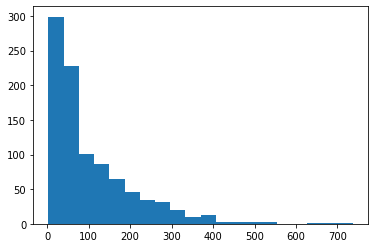

In [42]:
##############################################EDA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Generate a histogram of number of reviews. For this we need a number of ratings for each user
rating_counts = ratings.groupby("user_id").agg({"rating": np.size})

plt.hist(rating_counts["rating"], bins=20)
plt.xlabel="Rating counts"
plt.ylabel="Frequency"
plt.ylim=(0,100)
plt.show()

In [67]:
#That's a lot of people with a lot of reviews! How many, exactly? 

len(rating_counts[rating_counts["rating"]>300])

big_reviewers = rating_counts[rating_counts["rating"]>300].index

#remove these IDs from our ratingsByUser

ratingsByUser_pruned = ratingsByUser.drop(big_reviewers)
    
        

In [69]:
#Generate our correlation matrix


correlationMatrix = ratingsByUser_pruned.corr(method="pearson", min_periods=50)
correlationMatrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.266262,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
#Now let's generate some ratings for userID 0, as we did in the example, by taking a look at what they liked
user_0_ratings = ratingsByUser.iloc[0].dropna()

user_0_ratings

title
Empire Strikes Back, The (1980)    5.0
Gone with the Wind (1939)          1.0
Star Wars (1977)                   5.0
Name: 0, dtype: float64

#So now we need to make a scoring algorithm based on movies he liked and didn't like.
#I propose that for a score of 3-5, we consider this "movie the person liked", and multiply the correlation score
#For a score of 1-2, we consider this "movie a person didn't like" and multiply the correlation score by -1 (for 2) or -2 (for a score of 1)

In [99]:
#Here's our scoring algorithm
simCandidates = pd.Series()


for i in range(len(user_0_ratings)):
    print("Generating similarities for: ", user_0_ratings.index[i], "...")
    sims_matrix = correlationMatrix[user_0_ratings.index[i]].dropna()
    if user_0_ratings[i] in np.arange(3,6) :
        sims_matrix = sims_matrix.map(lambda x: x * user_0_ratings[i])
    elif user_0_ratings[i] == 2.0:
        sims_matrix = sims_matrix.map(lambda x: x * -1)
    else:
        sims_matrix = sims_matrix.map(lambda x: x * -2)
    simCandidates = simCandidates.append(sims_matrix)
    
print ("sorting...")
simCandidates.sort_values(inplace = True, ascending = False)
print (simCandidates.head(10))




Generating similarities for:  Empire Strikes Back, The (1980) ...
Generating similarities for:  Gone with the Wind (1939) ...
Generating similarities for:  Star Wars (1977) ...
sorting...
Empire Strikes Back, The (1980)    5.000000
Star Wars (1977)                   5.000000
Empire Strikes Back, The (1980)    3.725313
Star Wars (1977)                   3.725313
Return of the Jedi (1983)          3.682464
Return of the Jedi (1983)          3.345482
Raiders of the Lost Ark (1981)     2.716259
Raiders of the Lost Ark (1981)     2.645687
Con Air (1997)                     2.515322
Cliffhanger (1993)                 2.486325
dtype: float64


In [97]:
simCandidates = simCandidates.groupby(simCandidates.index).sum()


In [98]:
simCandidates.sort_values(ascending=False)

Star Wars (1977)                      8.591137
Empire Strikes Back, The (1980)       8.541257
Return of the Jedi (1983)             6.751903
Raiders of the Lost Ark (1981)        5.170499
Cliffhanger (1993)                    3.961282
                                        ...   
Evil Dead II (1987)                  -1.088768
First Wives Club, The (1996)         -1.278855
Strictly Ballroom (1992)             -1.450109
What's Eating Gilbert Grape (1993)   -1.688299
In the Name of the Father (1993)     -2.026593
Length: 393, dtype: float64